In [1]:
import geopandas as gpd


In [2]:
path_data = 'data/data-base/ChinaAdminDivisonSHP/4. District/district.shp'



In [6]:
district_gpd = gpd.read_file(path_data)
district_gpd.head(2)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110101,东城区,110100,北京城区,110000,北京市,100000,中华人民共和国,"POLYGON ((116.38766 39.96092, 116.38948 39.961..."
1,110102,西城区,110100,北京城区,110000,北京市,100000,中华人民共和国,"POLYGON ((116.39301 39.96916, 116.39235 39.968..."


<Axes: >

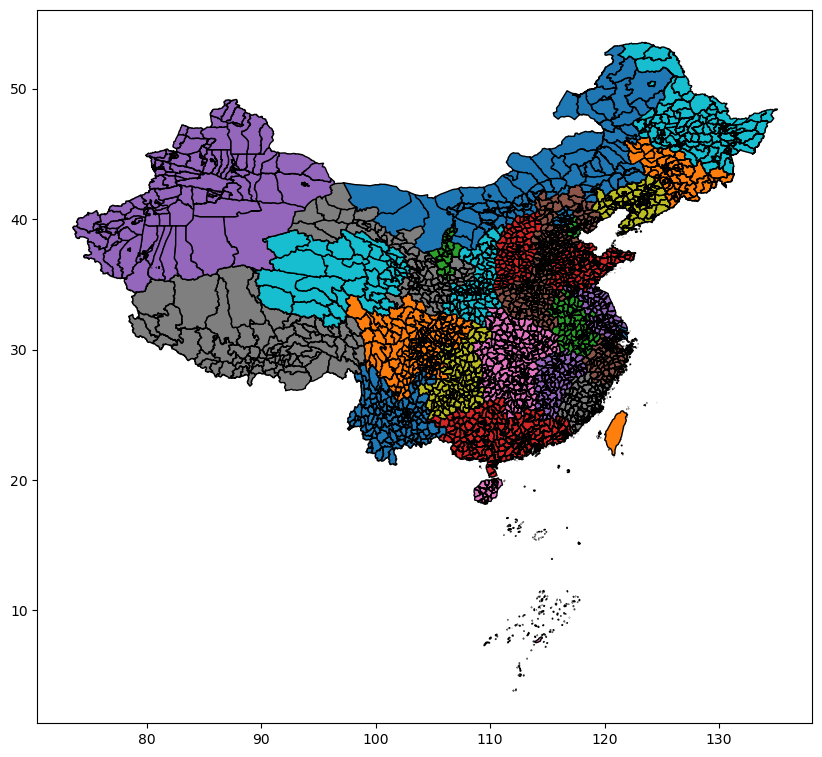

In [11]:
district_gpd.plot(edgecolor='black',figsize=(10,10), column='pr_name')



In [13]:
district_gpd.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
district_gpd.total_bounds



array([ 73.502355,   3.83703 , 135.09567 ,  53.563624])

array([False, False, False, ..., False, False, False])

In [23]:
# kunming_district = district_gpd[district_gpd['ct_name']=='昆明市']
kunming_district = district_gpd.iloc[district_gpd['ct_name'].values =='昆明市']
kunming_district.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
2279,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
2280,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
2281,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
2282,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
2283,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.8034 26.30291, 102.80537 26.3031..."


In [ ]:
path_out = 'data/data-section-3/111.gpkg'
kunming_district.to_file(path_out)


<Axes: >

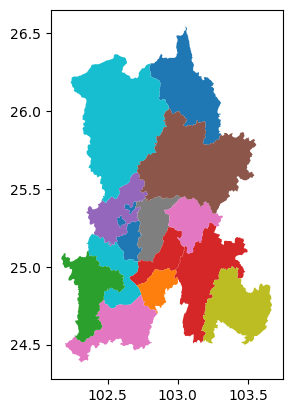

In [28]:
kunming_district.plot(column='dt_name')


In [30]:
kunming_district['dt_name']

2279          五华区
2280          盘龙区
2281          官渡区
2282          西山区
2283          东川区
2284          呈贡区
2285          晋宁区
2286          富民县
2287          宜良县
2288      石林彝族自治县
2289          嵩明县
2290    禄劝彝族苗族自治县
2291    寻甸回族彝族自治县
2292          安宁市
Name: dt_name, dtype: object

In [37]:
kunming_district.loc[:,'dt_name'] = ['wuhua', 'panlong', 'guandu','xishan', 
                               'dongchuan', 'chenggong', 'jinning', 
                               'fuxin', 'yiliang', 'shilin', 
                               'sonming', 'luquan', 'xundian', 'anning']



In [39]:
kunming_district.head(2)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
2279,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
2280,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."


In [42]:
kunming_district_utm47 = kunming_district.to_crs(32647)
area = kunming_district_utm47.area/1000000
area

2279     389.453097
2280     866.442119
2281     640.042332
2282     888.570176
2283    1872.055653
2284     500.658898
2285    1340.914729
2286     995.891595
2287    1921.005117
2288    1688.664859
2289     831.211083
2290    4234.501447
2291    3610.418560
2292    1302.647857
dtype: float64

In [43]:
kunming_district.loc[:,'area(km2)'] = area


c:\Users\HP\miniconda3\envs\myenv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [45]:
kunming_district.head(2)



,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2)
2279,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ...",389.453097
2280,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045...",866.442119


In [48]:
kunming_district.loc[:,'centroid'] = kunming_district.centroid



C:\Users\HP\AppData\Local\Temp\ipykernel_1932\2564841968.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kunming_district.loc[:,'centroid'] = kunming_district.centroid
c:\Users\HP\miniconda3\envs\myenv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [50]:
kunming_district.head(2)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2),centroid
2279,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ...",389.453097,POINT (102.65865 25.18956)
2280,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045...",866.442119,POINT (102.825 25.26525)


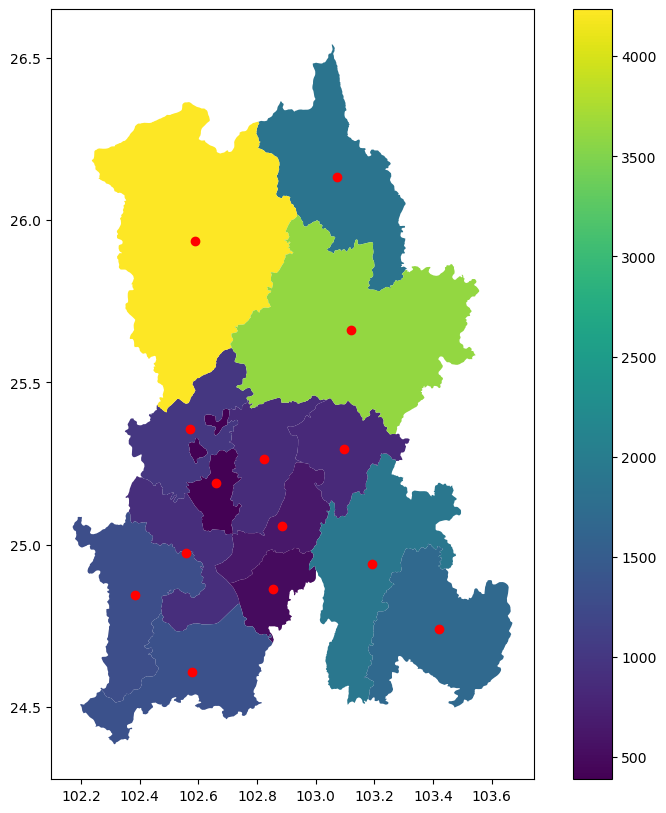

In [57]:
ax = kunming_district.plot(column='area(km2)', figsize=(10,10), legend=True)
ax = kunming_district['centroid'].plot(ax=ax, color='red')


In [58]:
kunming_district.head(2)



,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2),centroid
2279,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ...",389.453097,POINT (102.65865 25.18956)
2280,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045...",866.442119,POINT (102.825 25.26525)


In [62]:
kunming_district =kunming_district.drop('centroid', axis=1)


In [63]:
kunming_district.head(2)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2)
2279,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ...",389.453097
2280,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045...",866.442119
